In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import math
import os


In [ ]:
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


In [ ]:
df.info()
object_cols = df.select_dtypes(include='object').columns
numcols = df.select_dtypes(include=['int64', 'float64']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [ ]:
print(df.isnull().sum())

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64


In [ ]:
df.describe(include='all').iloc[1]

,unique
school,2
sex,2
address,2
famsize,2
Pstatus,2
Medu,NaN
Fedu,NaN
Mjob,5
Fjob,5
reason,4


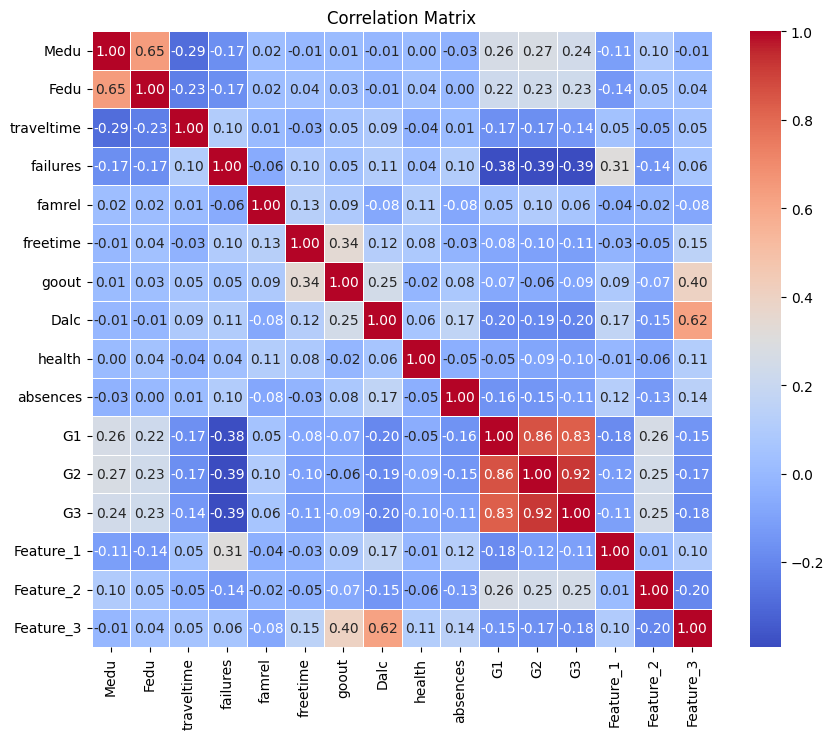

In [ ]:
corr_matrix = df[numcols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
def scatterme(xaxis, yaxis, pos, axs, df):
  ax = axs[pos]
  ax.scatter(df[xaxis], df[yaxis])
  ax.set_xlabel(xaxis)
  ax.set_ylabel(yaxis)
  ax.set_title(f'Scatter Plot of {xaxis} vs {yaxis}')

def boxme(xaxis, yaxis, pos, axs, df):
    ax = axs[pos]
    df.boxplot(column=yaxis, by=xaxis, ax=ax)
    ax.set_xlabel(xaxis)
    ax.set_ylabel(yaxis)
    ax.set_title(f'Box Plot of {yaxis} by {xaxis}')

def barsum(xaxis, yaxis, pos, axs,df):
  ax = axs[pos]
  y = df.groupby(xaxis)[yaxis].sum()
  ax.bar(y.index, y.values)
  ax.set_xlabel(xaxis)
  ax.set_ylabel(yaxis)
  ax.set_title('Total '+yaxis + ' per ' + xaxis)

def baravg(xaxis, yaxis, pos, axs, df):
  ax = axs[pos]
  y = df.groupby(xaxis)[yaxis].mean()
  ax.bar(y.index, y.values)
  ax.set_xlabel(xaxis)
  ax.set_ylabel(yaxis)
  ax.set_title('Average '+yaxis + ' per ' + xaxis)

<Axes: xlabel='Feature_1', ylabel='Count'>

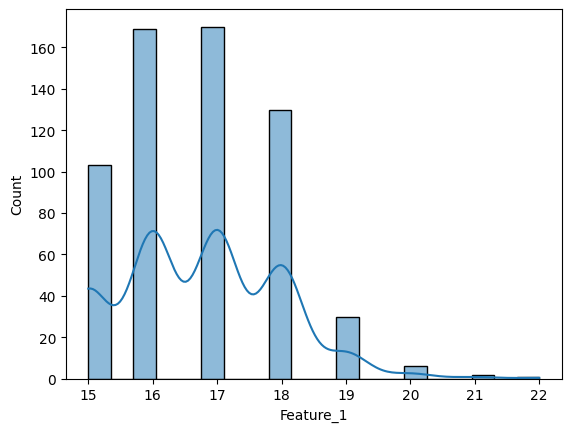

In [ ]:
sns.histplot(df['Feature_1'], kde=True, bins=20)


most likely age.. now checkingg corr matrix


1.   negative correlation with grades(makes sense)
2.   positive correlation with alcohol consumption
3.  more failures



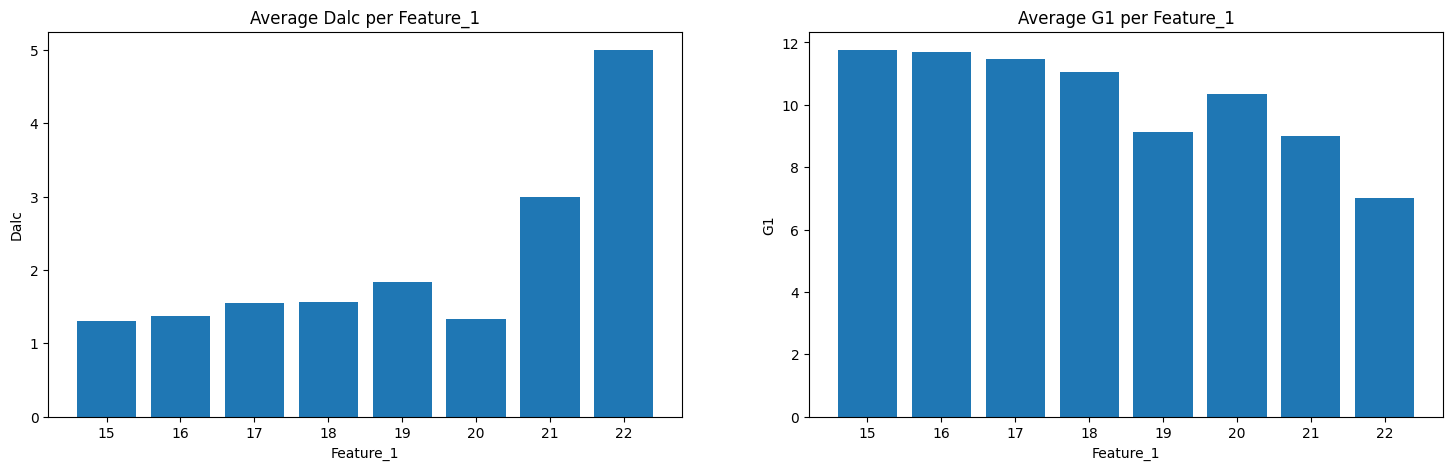

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
axs = axs.flatten()

baravg('Feature_1', 'Dalc', 0, axs, df)
baravg('Feature_1', 'G1', 1, axs, df)

<Axes: xlabel='Feature_2', ylabel='Count'>

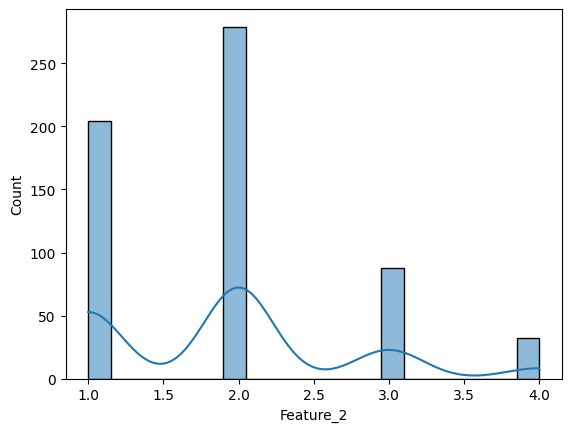

In [ ]:
sns.histplot(df['Feature_2'], kde=True, bins=20)

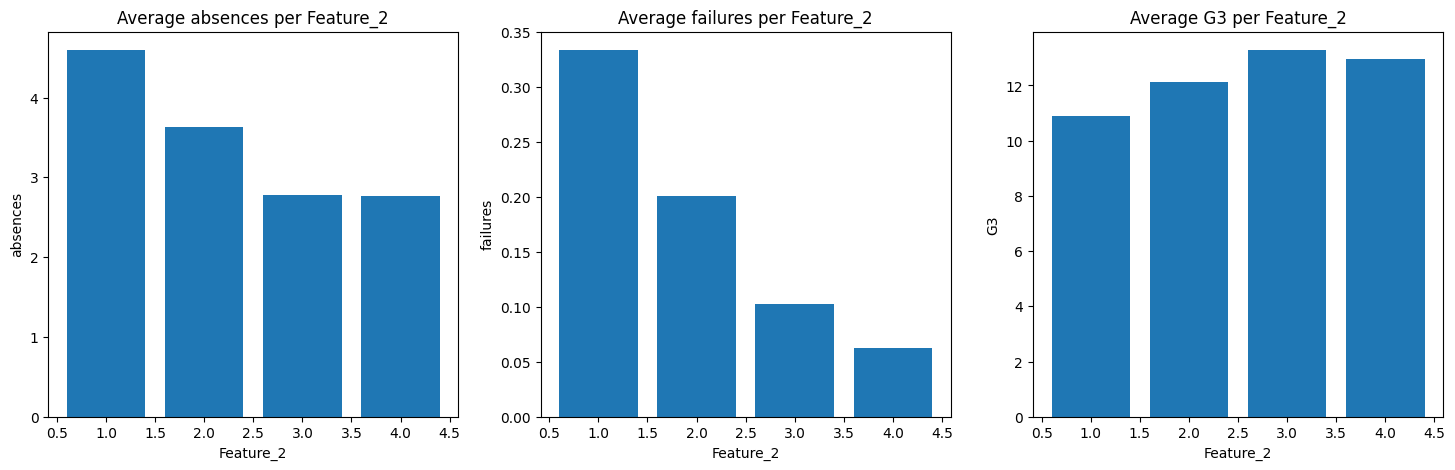

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.flatten()

df['totalgrade']  = (df['G1'] + df['G2'])/2

baravg('Feature_2', 'absences', 0, axs, df)
baravg('Feature_2', 'failures', 1, axs, df)
baravg('Feature_2', 'G3', 2, axs, df)

given these relationships i think it is most likely feature two somehow correlates to how much you study. Since many columnes are ____time. I think feature 2 is study time

<Axes: xlabel='Feature_3', ylabel='Count'>

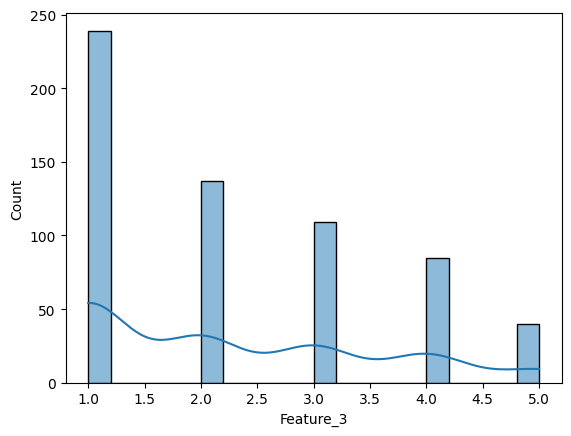

In [ ]:
sns.histplot(df['Feature_3'], kde=True, bins=20)

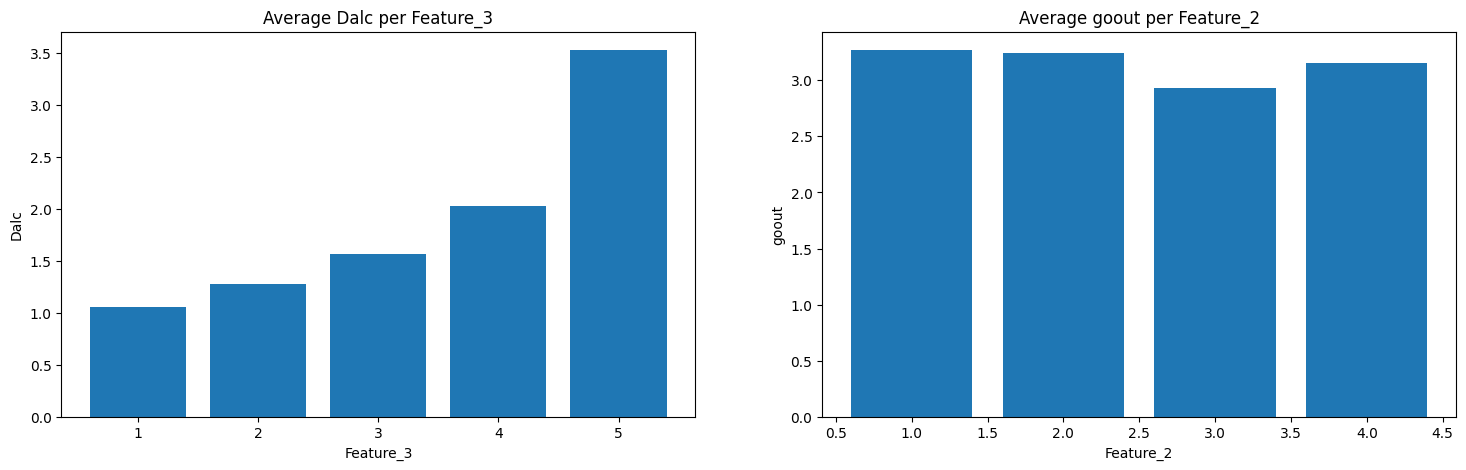

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
axs = axs.flatten()

baravg('Feature_3', 'Dalc', 0, axs, df)
baravg('Feature_2', 'goout', 1, axs, df)

Since the Dalc column is there and it says specifically in the description it is Weekday alcohol consumption. Following the very high correlation with Dalc and its name i believe that Feature 3 corresponds to weekend alcohol consumption otherwise why would they specific weekday alcohol consumption over there

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
address,0
famsize,50
Pstatus,0
Medu,0
Fedu,73
Mjob,0
Fjob,0
reason,0


In [ ]:
df.shape

(649, 34)

We make mode to replace for all categorical data like famsize and higher
we take median to replace the rest because their order has value 1 is less or greater than 2

In [ ]:
mode = ['famsize', 'higher']
median = ['Fedu', 'traveltime', 'freetime', 'absences', 'G2','Feature_1', 'Feature_2', 'Feature_3', 'totalgrade']

for col in mode:
        df[col].fillna(df[col].mode()[0], inplace=True)

for col in median:
        df[col].fillna(df[col].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
school,0
sex,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0
reason,0


In [ ]:
df.dtypes

,0
school,object
sex,object
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,float64
Mjob,object
Fjob,object
reason,object


In [ ]:
df.rename(columns={'Feature_1': 'age','Feature_2': 'studytime','Feature_3': 'Ealc'}, inplace=True)

In [ ]:
yes_no_cols = [
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic'
]

for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

In [ ]:
# numeric_df = df.select_dtypes(include=['int64', 'float64'])

# corr_matrix = numeric_df.corr()

# plt.figure(figsize=(14, 10))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
# plt.title("Correlation Matrix of Numerical Features")
# plt.tight_layout()
# plt.show()

###What all effects Romantic Relationships

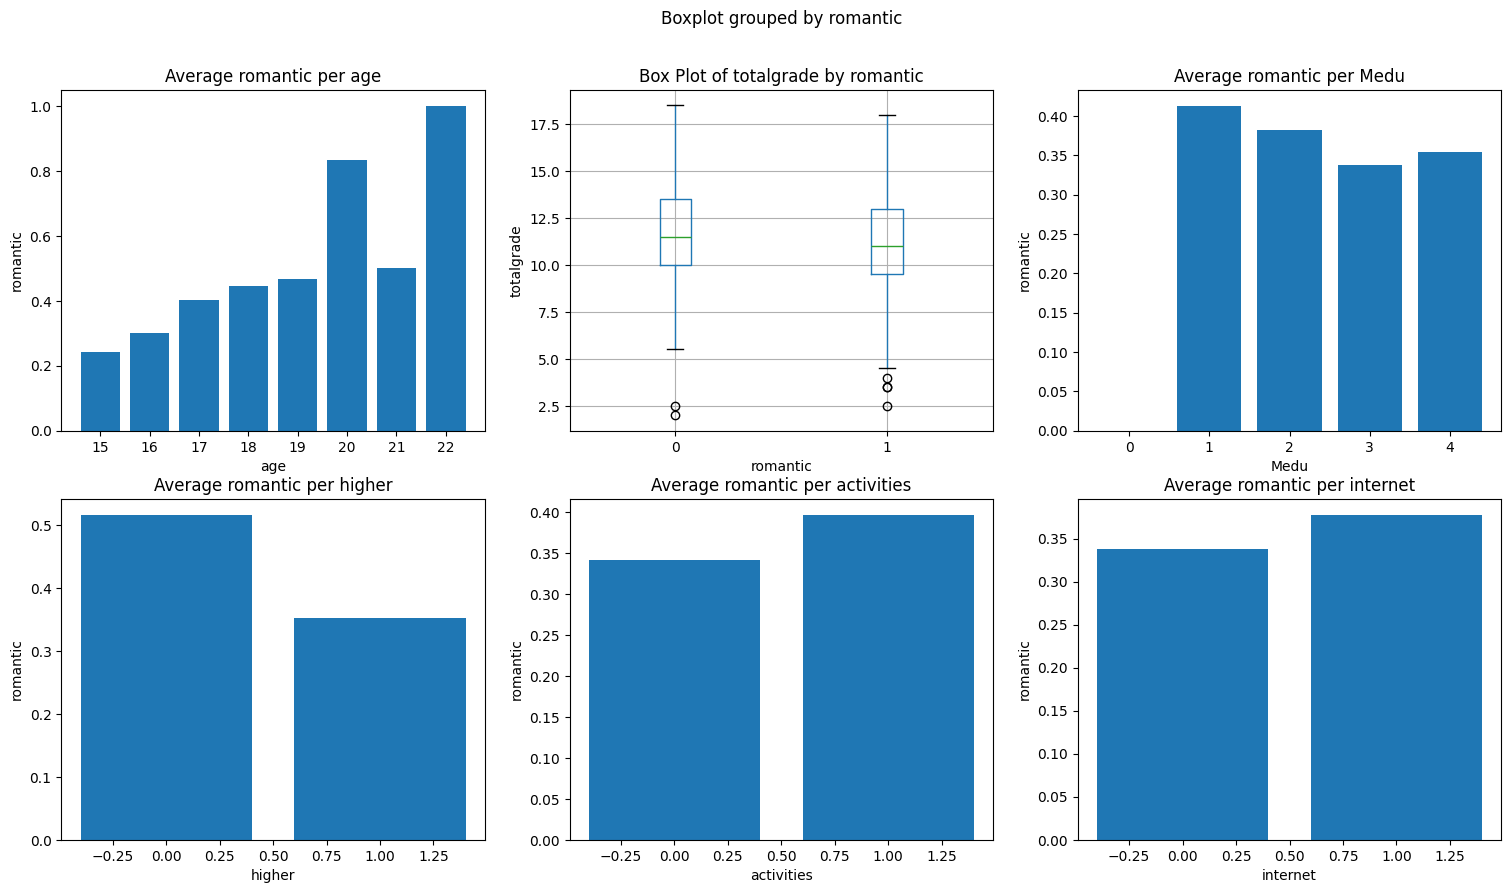

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

baravg('age', 'romantic', 0, axs, df)
boxme('romantic', 'totalgrade', 1, axs, df)
baravg('Medu', 'romantic', 2, axs, df)
baravg('higher', 'romantic', 3, axs, df)
baravg('activities', 'romantic', 4, axs, df)
baravg('internet', 'romantic', 5, axs, df)

I took the average of romantic column because it is binary and the best measure would be to find out what populace of a certain group is in rel or not by taking the average.

Result:

1.) Higher your age higher the chance of a romantic relationship(you do go through a break up phase at 21 though)

2.) From the boxplot seems like if you are not in relationship you have a chance of getting slightly better grades.(i checked the average as well)

3.) Mothers with low level of education have children with higher possibility of being in a romantic relationship(result is approx same for fathers as well)

4.) If you have plans to pursue higher educaation chances are you are not getting in a relationship

5.) higher extra curriculurs = higher chance of being in a romantic relationship

6.)Hacing internet access again increases your chance of being in a romantic relationship(online dating)


###How is your health related to your life?

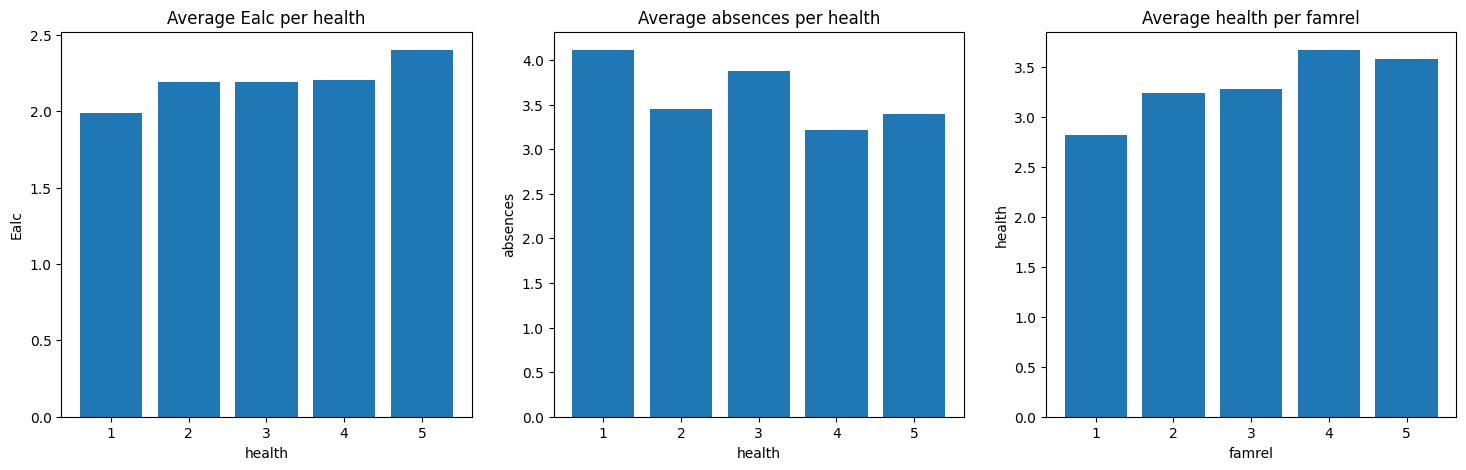

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.flatten()

baravg('health', 'Ealc', 0, axs, df)
baravg('health', 'absences', 1, axs, df)
baravg('famrel', 'health', 2, axs, df)

1)surprisingly people who have rated themselves as have better health on average drink more alcohol

2)better health leads to less absences from class

3)a better family relationship leads to beter health

###How grades are effected

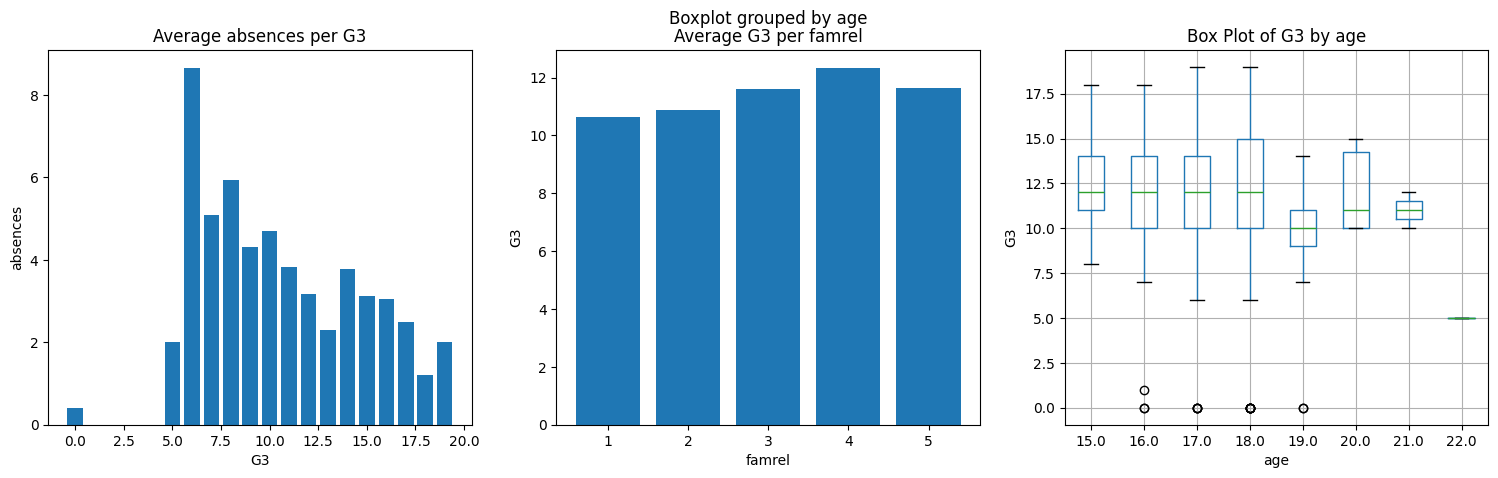

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.flatten()

baravg('G3', 'absences', 0, axs, df)
baravg('famrel', 'G3', 1, axs, df)
boxme('age', 'G3', 2, axs, df)

1) Higher absences leads to lower grade

2) A better family rlationship leadas to better grades

3) Higher your age more diversified your grades are. At a young age more students are focused at getting better grades but as your age increases the student pool diversifies as can be seen from the boxplot. Also the median has a slighly decreasing trend

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
bincols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
catcols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'guardian', 'Mjob', 'Fjob', 'reason']
numcols = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
    'famrel', 'freetime', 'goout', 'Dalc', 'Ealc', 'health',
    'absences', 'G1', 'G2', 'G3', 'totalgrade'
]

X = df[catcols + numcols + bincols[:-1]]
y = df['romantic']

preprocessor1 = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', sparse_output=False), catcols),
    ('num', StandardScaler(), numcols)
], remainder='passthrough')

preprocessor2 = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', sparse_output=False), catcols),
], remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc

In [ ]:
rf_pipe = Pipeline([
    ('preprocessing', preprocessor2),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_params = {
    'classifier__n_estimators': list(range(50, 550, 50))
}

rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X, y)

print("n for rf = ", rf_grid.best_params_['classifier__n_estimators'])

xgb_pipe = Pipeline([
    ('preprocessing', preprocessor2),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_params = {
    'classifier__n_estimators': list(range(50, 550, 50))
}

xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X, y)

print("n for xg", xgb_grid.best_params_['classifier__n_estimators'])

n for rf =  150
n for xg 50


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
results = []
scaled_models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, C=0.1),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier()
}

tree_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in scaled_models.items():
    pipe = Pipeline([
        ('preprocessing', preprocessor1),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1 (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1 (1)': report['1']['f1-score']
    })

for name, model in tree_models.items():
    pipe = Pipeline([
        ('preprocessing', preprocessor2),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1 (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1 (1)': report['1']['f1-score']
    })
results_df = pd.DataFrame(results)

In [ ]:

results_df

,Model,Accuracy,Precision (0),Recall (0),F1 (0),Precision (1),Recall (1),F1 (1)
0,Logistic Regression,0.630769,0.672414,0.886364,0.764706,0.285714,0.095238,0.142857
1,SVC,0.600000,0.655172,0.863636,0.745098,0.142857,0.047619,0.071429
2,KNN,0.523077,0.632653,0.704545,0.666667,0.187500,0.142857,0.162162
3,Decision Tree,0.584615,0.717949,0.636364,0.674699,0.384615,0.476190,0.425532
4,Random Forest,0.615385,0.666667,0.863636,0.752475,0.250000,0.095238,0.137931
5,XGBoost,0.569231,0.681818,0.681818,0.681818,0.333333,0.333333,0.333333


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', sparse_output=False), catcols),
    ('num', StandardScaler(), numcols),
    ('bin', 'passthrough', bincols[:-1])  # remove 'romantic'
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

X_train_tensor = torch.tensor(X_train_proc, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_proc, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
class Swish(nn.Module):
    def __init__(self, inplace=True):
        super(Swish, self).__init__()
        self.inplace = inplace

    def forward(self, x):
        if self.inplace:
            x.mul_(torch.sigmoid(x))
            return x
        else:
            return x * torch.sigmoid(x)

def createnn(inputn, hn, outputn):
    return nn.Sequential(
        nn.Linear(inputn, hn), nn.ReLU(),
        nn.Linear(hn, hn), Swish(),
        nn.Linear(hn, hn),Swish(),
        nn.Linear(hn, hn), Swish(),
        nn.Linear(hn, outputn),
        nn.Sigmoid()
    )

def init_normal(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)



In [ ]:
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
torch.manual_seed(42)
np.random.seed(42)
input_dim = X_train_tensor.shape[1]
model = createnn(inputn=input_dim, hn=512, outputn=1)
model.apply(init_normal)


criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []

for epoch in range(12):
    # Training
    model.train()
    optimizer.zero_grad()
    preds = model(X_train_tensor).squeeze(1)
    loss = criterion(preds, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor).squeeze(1)
        val_loss = criterion(val_preds, y_test_tensor)
        val_losses.append(val_loss.item())
    if(epoch%1==0):
     print(f"Epoch {epoch+1} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")


Epoch 1 | Train Loss: 0.8061 | Val Loss: 1.4685
Epoch 2 | Train Loss: 1.8296 | Val Loss: 0.9451
Epoch 3 | Train Loss: 1.0488 | Val Loss: 0.6630
Epoch 4 | Train Loss: 0.6150 | Val Loss: 0.8030
Epoch 5 | Train Loss: 0.7618 | Val Loss: 0.8081
Epoch 6 | Train Loss: 0.7554 | Val Loss: 0.7013
Epoch 7 | Train Loss: 0.6354 | Val Loss: 0.6486
Epoch 8 | Train Loss: 0.5880 | Val Loss: 0.6782
Epoch 9 | Train Loss: 0.6359 | Val Loss: 0.6926
Epoch 10 | Train Loss: 0.6502 | Val Loss: 0.6675
Epoch 11 | Train Loss: 0.6067 | Val Loss: 0.6465
Epoch 12 | Train Loss: 0.5640 | Val Loss: 0.6611


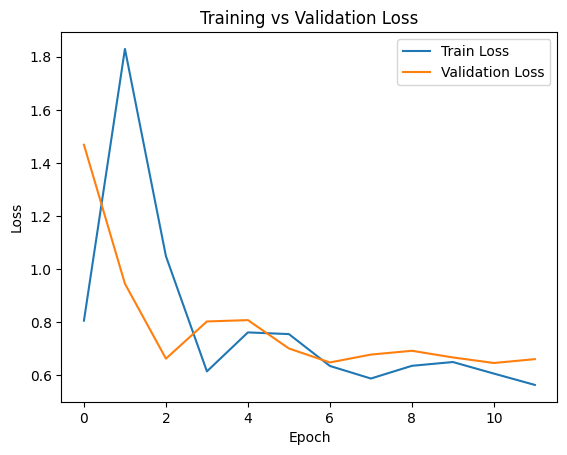

In [ ]:

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor.float()).squeeze(1)
    preds_proba = outputs.cpu().numpy()  # probabilities between 0 and 1
    preds = (preds_proba >= 0.5).astype(int)
df_scores= classification_report(y_test, preds)
print(df_scores)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")


              precision    recall  f1-score   support

           0       0.66      0.80      0.72        44
           1       0.25      0.14      0.18        21

    accuracy                           0.58        65
   macro avg       0.46      0.47      0.45        65
weighted avg       0.53      0.58      0.55        65

Accuracy: 0.5846


In [ ]:
df.describe()

,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,...,health,absences,G1,G2,G3,age,studytime,Ealc,romantic,totalgrade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,2.514638,2.269646,1.510015,0.221880,0.104777,0.613251,0.060092,0.485362,0.802773,0.901387,...,3.536210,3.560863,11.399076,11.554700,11.906009,16.762712,1.919877,2.246533,0.368259,11.496918
std,1.134552,1.051022,0.724553,0.593235,0.306502,0.487381,0.237841,0.500171,0.398212,0.298372,...,1.446259,4.506142,2.745265,2.850793,3.230656,1.182079,0.801073,1.247562,0.482704,2.662756
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,0.000000,2.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000,0.000000,10.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000,0.000000,11.500000
75%,4.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000,1.000000,13.500000
max,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000,1.000000,18.500000


All of the models tend to lean heavily toward predicting class 0 (students not in a relationship), which shows up in the consistently high precision, recall, and F1 scores for that class. On the flip side, they all struggle with class 1 (students who are in a relationship). Logistic Regression came out on top in terms of overall accuracy (about 63%) and gave the most balanced results, but even then, its F1 score for class 1 was only 0.14 — so it still misses a lot of actual positives. SVC and KNN did even worse, barely catching any of the class 1 cases (recalls of just 0.047 and 0.14), which probably means they’re skewed by the class imbalance and just playing it safe by defaulting to class 0. The Decision Tree did a bit better at picking up class 1, with an F1 of 0.42 — not great, but relatively the best — though that came at the cost of lower performance on class 0 and overall accuracy. Random Forest, while accurate on class 0, basically ignored class 1 (F1 of 0.13), which is typical when ensembles like this are influenced by majority voting. XGBoost was a bit different — it had fairly balanced recall for both classes (about 0.68 each), but its F1 for class 1 was still low (0.33), suggesting it predicted more positives but a lot of them were wrong. The neural network, despite its flexibility, actually performed the worst on class 1 — with precision, recall, and F1 all well below acceptable levels. It mostly learned to predict class 0, likely due to the imbalance in the data and lack of sufficient examples for class 1 to learn meaningful patterns. Overall, class 1 performance is clearly a weak point for all the models.


In [ ]:
import shap
from mlxtend.plotting import plot_decision_regions


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        44
           1       0.33      0.05      0.08        21

    accuracy                           0.66        65
   macro avg       0.51      0.50      0.44        65
weighted avg       0.57      0.66      0.56        65



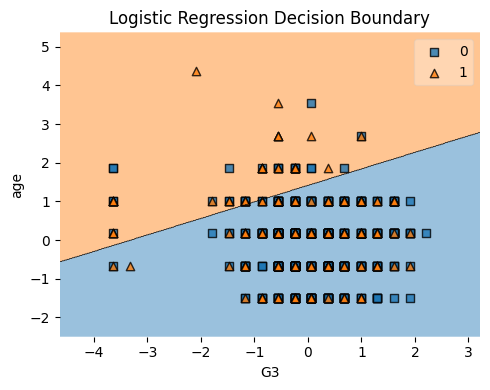

  0%|          | 0/584 [00:00<?, ?it/s]

SHAP Summary Plot:


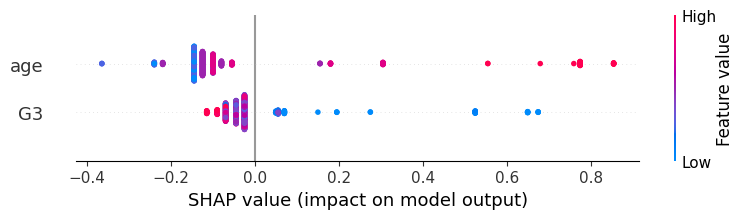

  0%|          | 0/1 [00:00<?, ?it/s]

Waterfall Plot - Predicted Yes:


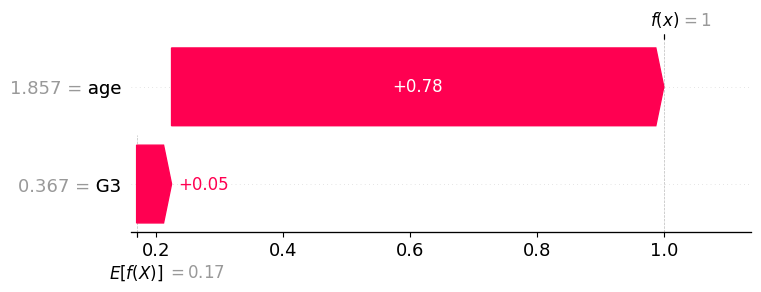

  0%|          | 0/1 [00:00<?, ?it/s]

Waterfall Plot - Predicted No:


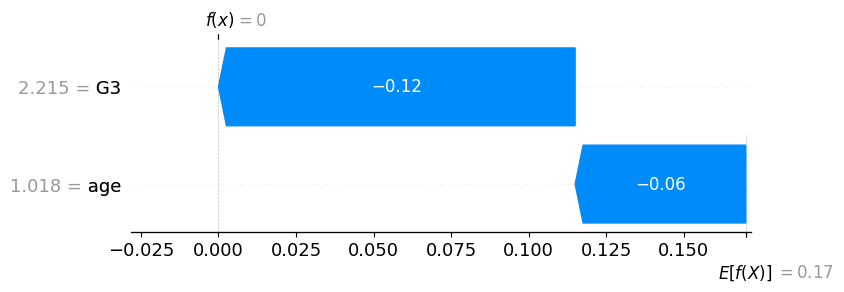

🔍 Interpretation: Model uses 'G3' and 'age' to predict relationship status.


=== SVC ===
              precision    recall  f1-score   support

           0       0.68      0.98      0.80        44
           1       0.50      0.05      0.09        21

    accuracy                           0.68        65
   macro avg       0.59      0.51      0.45        65
weighted avg       0.62      0.68      0.57        65



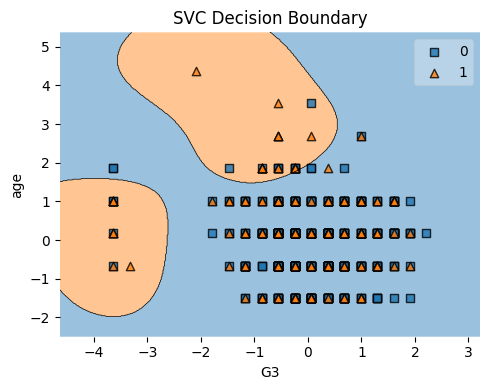

  0%|          | 0/584 [00:00<?, ?it/s]

SHAP Summary Plot:


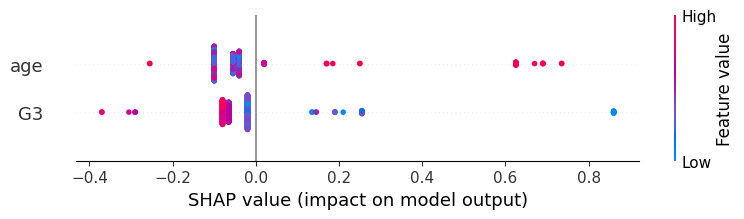

  0%|          | 0/1 [00:00<?, ?it/s]

Waterfall Plot - Predicted Yes:


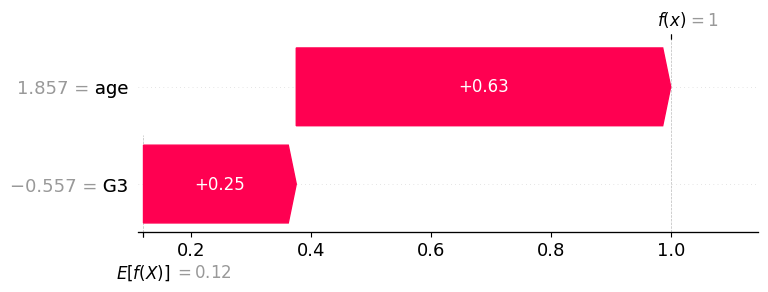

  0%|          | 0/1 [00:00<?, ?it/s]

Waterfall Plot - Predicted No:


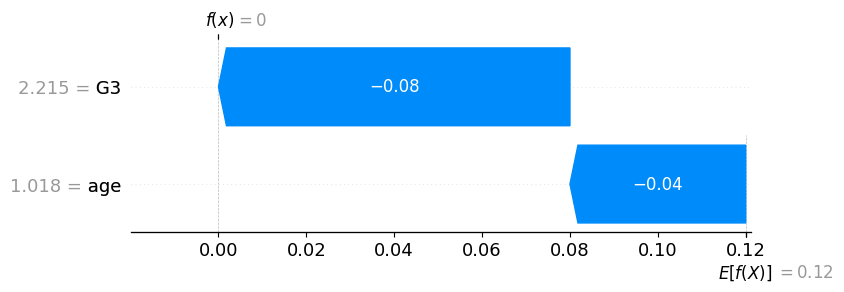

🔍 Interpretation: Model uses 'G3' and 'age' to predict relationship status.


=== KNN ===
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        44
           1       0.25      0.19      0.22        21

    accuracy                           0.55        65
   macro avg       0.45      0.46      0.45        65
weighted avg       0.52      0.55      0.54        65



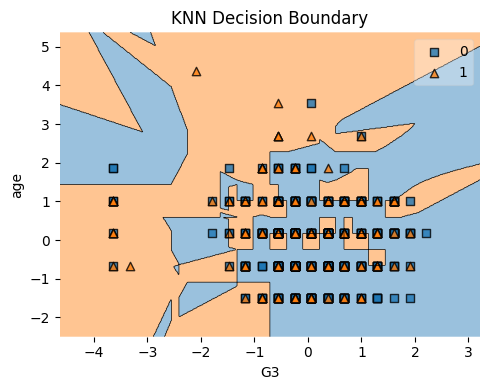

  0%|          | 0/584 [00:00<?, ?it/s]

SHAP Summary Plot:


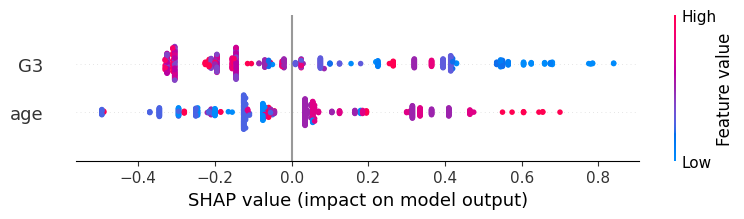

  0%|          | 0/1 [00:00<?, ?it/s]

Waterfall Plot - Predicted Yes:


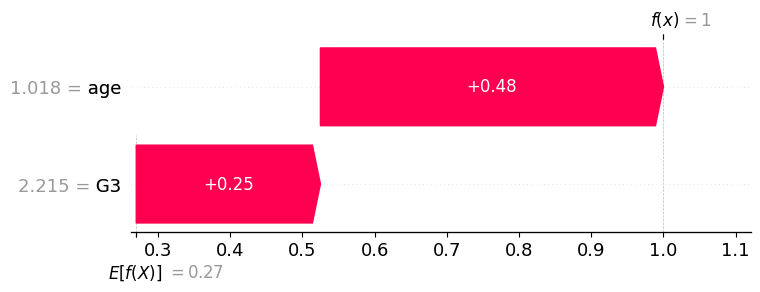

  0%|          | 0/1 [00:00<?, ?it/s]

Waterfall Plot - Predicted No:


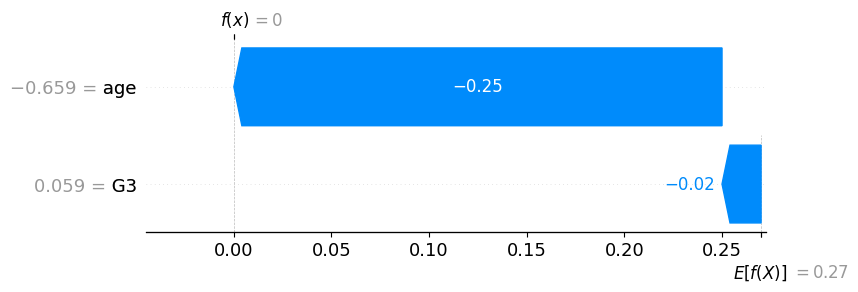

🔍 Interpretation: Model uses 'G3' and 'age' to predict relationship status.


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.66      0.80      0.72        44
           1       0.25      0.14      0.18        21

    accuracy                           0.58        65
   macro avg       0.46      0.47      0.45        65
weighted avg       0.53      0.58      0.55        65



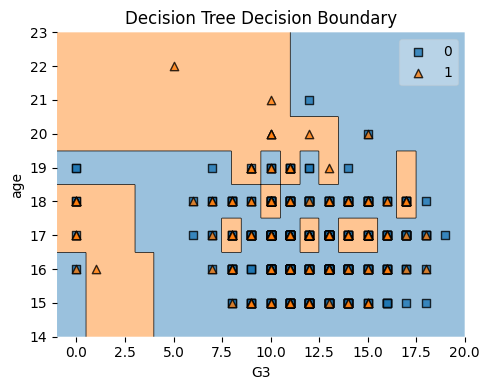

SHAP Summary Plot:


<Figure size 640x480 with 0 Axes>

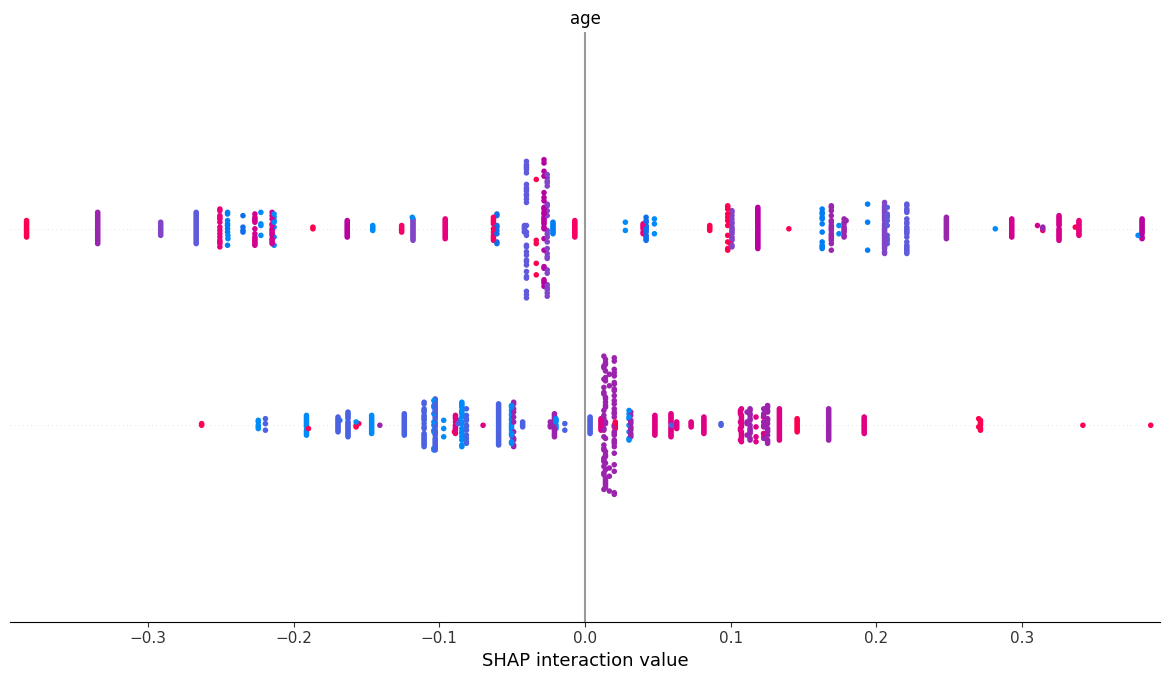

Waterfall Plot - Predicted Yes:
SHAP explanation failed for Decision Tree: 0
🔍 Interpretation: Model uses 'G3' and 'age' to predict relationship status.


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.66      0.80      0.72        44
           1       0.25      0.14      0.18        21

    accuracy                           0.58        65
   macro avg       0.46      0.47      0.45        65
weighted avg       0.53      0.58      0.55        65



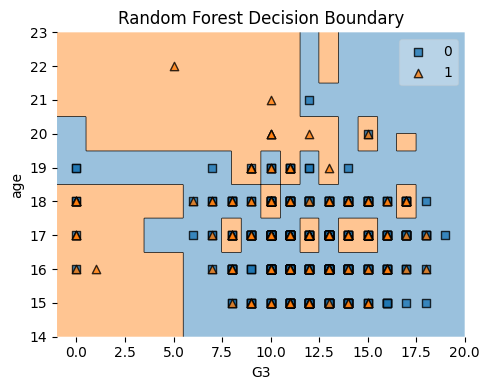

SHAP Summary Plot:


<Figure size 640x480 with 0 Axes>

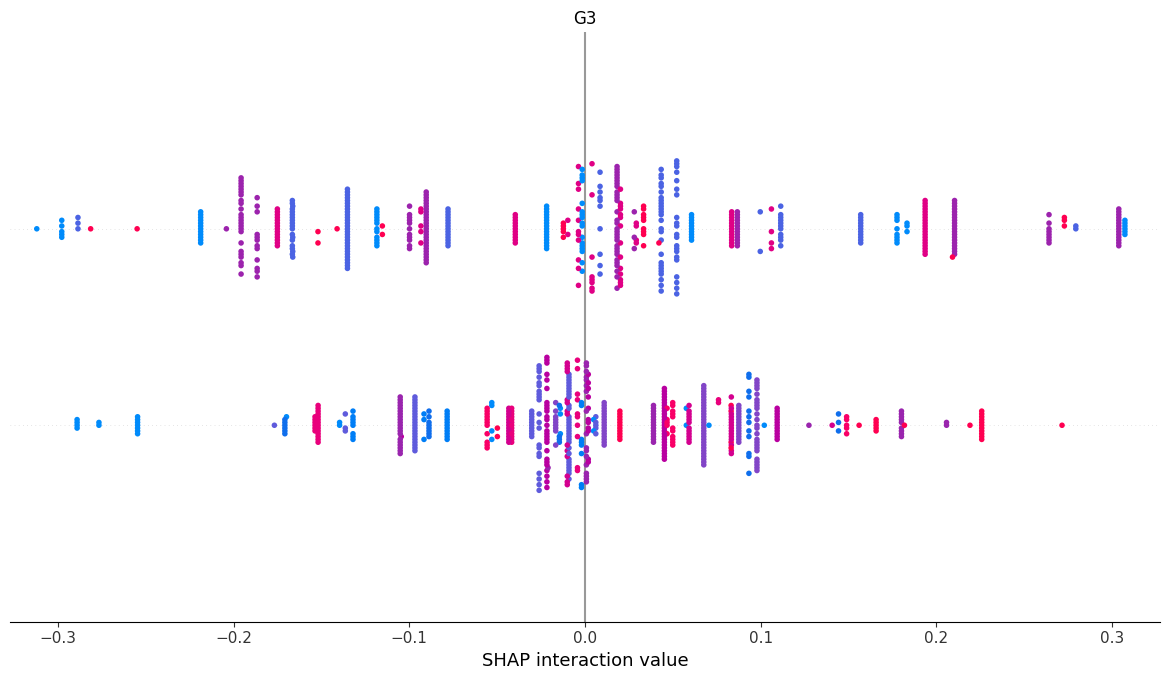

Waterfall Plot - Predicted Yes:
SHAP explanation failed for Random Forest: 0
🔍 Interpretation: Model uses 'G3' and 'age' to predict relationship status.


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.67      0.82      0.73        44
           1       0.27      0.14      0.19        21

    accuracy                           0.60        65
   macro avg       0.47      0.48      0.46        65
weighted avg       0.54      0.60      0.56        65



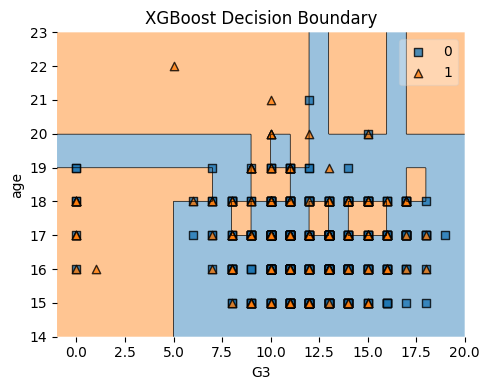

SHAP Summary Plot:


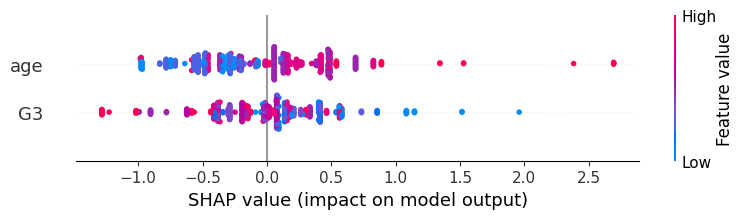

Waterfall Plot - Predicted Yes:
SHAP explanation failed for XGBoost: 0
🔍 Interpretation: Model uses 'G3' and 'age' to predict relationship status.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

def ensure_numpy(X):
    return X.to_numpy() if isinstance(X, pd.DataFrame) else X

# Choose features to visualize
feature_x = 'G3'
feature_y = 'age'

X = df[[feature_x, feature_y]]
y = df['romantic']  # binary 0/1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocessors
preprocessor1 = ColumnTransformer([('scale', StandardScaler(), [feature_x, feature_y])])
preprocessor2 = FunctionTransformer(lambda x: x)  # passthrough for tree models

def visualize_model(name, model, preprocessor):
    print(f"\n=== {name} ===")

    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Decision boundary
    fig, ax = plt.subplots(figsize=(5, 4))
    X_vis = pipe.named_steps['preprocessing'].transform(X_train)
    plot_decision_regions(ensure_numpy(X_vis), y_train.to_numpy(), clf=pipe.named_steps['classifier'], ax=ax)
    ax.set_title(f"{name} Decision Boundary")
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    plt.tight_layout()
    plt.show()

    # SHAP explanation
    X_trans = pipe.named_steps['preprocessing'].transform(X_train)

    try:
        if name in tree_models:
            explainer = shap.TreeExplainer(pipe.named_steps['classifier'])
            shap_values = explainer.shap_values(X_trans)
        else:
            background = shap.sample(X_trans, 100) if len(X_trans) > 100 else X_trans
            explainer = shap.KernelExplainer(pipe.named_steps['classifier'].predict, background)
            shap_values = explainer.shap_values(X_trans, nsamples=100)

        print("SHAP Summary Plot:")
        shap.summary_plot(shap_values, X_trans, feature_names=[feature_x, feature_y])

        pred = pipe.predict(X_test)

        if np.any(pred == 1):
            yes_index = np.where(pred == 1)[0][0]
            instance = pipe.named_steps['preprocessing'].transform(X_test.iloc[[yes_index]])
            sv = explainer.shap_values(instance)

            print("Waterfall Plot - Predicted Yes:")
            try:
                # Try modern SHAP waterfall first
                shap.waterfall_plot(shap.Explanation(
                    values=sv[0] if not isinstance(sv, list) else (sv[1][0] if len(sv) > 1 else sv[0][0]),
                    base_values=explainer.expected_value if np.isscalar(explainer.expected_value) else (explainer.expected_value[1] if hasattr(explainer.expected_value, '__len__') and len(explainer.expected_value) > 1 else explainer.expected_value[0]),
                    data=instance[0],
                    feature_names=[feature_x, feature_y]
                ))
            except:
                # Fallback to force plot
                shap.force_plot(
                    explainer.expected_value if np.isscalar(explainer.expected_value) else (explainer.expected_value[1] if hasattr(explainer.expected_value, '__len__') and len(explainer.expected_value) > 1 else explainer.expected_value[0]),
                    sv[0] if not isinstance(sv, list) else (sv[1][0] if len(sv) > 1 else sv[0][0]),
                    instance[0],
                    feature_names=[feature_x, feature_y],
                    matplotlib=True
                )
        else:
            print("No 'Yes' predictions to explain.")

        if np.any(pred == 0):
            no_index = np.where(pred == 0)[0][0]
            instance = pipe.named_steps['preprocessing'].transform(X_test.iloc[[no_index]])
            sv = explainer.shap_values(instance)

            print("Waterfall Plot - Predicted No:")
            try:
                # Try modern SHAP waterfall first
                shap.waterfall_plot(shap.Explanation(
                    values=sv[0] if not isinstance(sv, list) else (sv[0][0] if len(sv) > 1 else sv[0][0]),
                    base_values=explainer.expected_value if np.isscalar(explainer.expected_value) else (explainer.expected_value[0] if hasattr(explainer.expected_value, '__len__') and len(explainer.expected_value) > 1 else explainer.expected_value[0]),
                    data=instance[0],
                    feature_names=[feature_x, feature_y]
                ))
            except:
                # Fallback to force plot
                shap.force_plot(
                    explainer.expected_value if np.isscalar(explainer.expected_value) else (explainer.expected_value[0] if hasattr(explainer.expected_value, '__len__') and len(explainer.expected_value) > 1 else explainer.expected_value[0]),
                    sv[0] if not isinstance(sv, list) else (sv[0][0] if len(sv) > 1 else sv[0][0]),
                    instance[0],
                    feature_names=[feature_x, feature_y],
                    matplotlib=True
                )
        else:
            print("No 'No' predictions to explain.")

    except Exception as e:
        print(f"SHAP explanation failed for {name}: {e}")

    print(f"🔍 Interpretation: Model uses '{feature_x}' and '{feature_y}' to predict relationship status.\n")

# Run for all scaled models
for name, model in scaled_models.items():
    visualize_model(name, model, preprocessor1)

# Run for all tree models
for name, model in tree_models.items():
    visualize_model(name, model, preprocessor2)

###BONUS TASK


PLOT 1: This looks like a tree based classifier due to the rectangles. I think it is Decision Tree

PLOT 2: This looks like overlap of many rectangles so i think an ensemble of many decision trees that is random forest

PLOT 3: I think it is SVC due to the smooth curve

PLOT 4:  It is Naive Bayes. The elliptical curve is a strong hint for it

PLOT 5: This is a KNN it was jagged

In [ ]:
N